# Codding attension mechanisum 

### Computing attention weights for one word

In [2]:
# input embeding
import torch
inputs = torch.tensor(
    [[0.43, 0.15, 0.89], # Your (x^1)
    [0.55, 0.87, 0.66], # journey (x^2)
    [0.57, 0.85, 0.64], # starts (x^3)
    [0.22, 0.58, 0.33], # with (x^4)
    [0.77, 0.25, 0.10], # one (x^5)
    [0.05, 0.80, 0.55]] # step (x^6)
    )

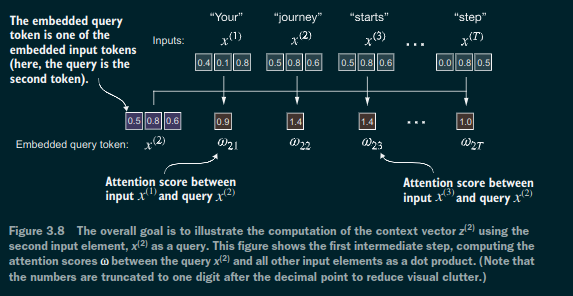

In [3]:
attn_scores_2 = torch.empty(inputs.shape[0])
query = inputs[1]

for i , input in enumerate(inputs):
    attn_scores_2[i] = torch.dot(query,input)

print("Attention scrore b/w input 2 and others inputs")
print(attn_scores_2)

Attention scrore b/w input 2 and others inputs
tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


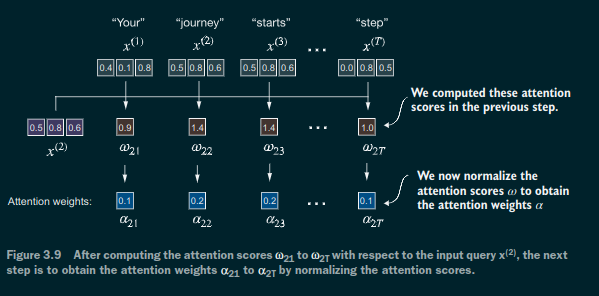

In [4]:
print("Normalized attention score")
nor_attn_2 = attn_scores_2 / attn_scores_2.sum()
print(nor_attn_2)
print("Sum of normalized attention")
print(nor_attn_2.sum())

Normalized attention score
tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum of normalized attention
tensor(1.0000)


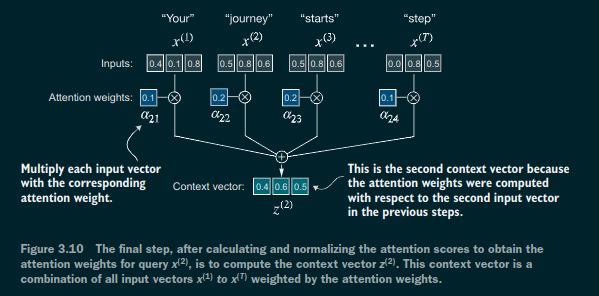

In [5]:
context_vec_2 = torch.zeros(query.shape)
for i , input in enumerate(inputs):
    context_vec_2 += nor_attn_2[i] * input

print(f'Context vector {context_vec_2}')

Context vector tensor([0.4355, 0.6451, 0.5680])


### Computing attention weights for all the words
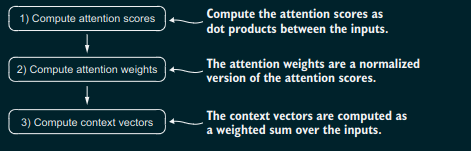

In [6]:
# computing attention scorces b/w the all the inputs

attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [7]:
# normalized attention weights
nor_attn = torch.softmax(attn_scores, dim = -1)
print(nor_attn)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [8]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [9]:
# context vector aftering applying attention weights
context_vector = nor_attn @ inputs
print(context_vector)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


# Implementing self-attention with trainable weights

### Computing self attention weights for one word

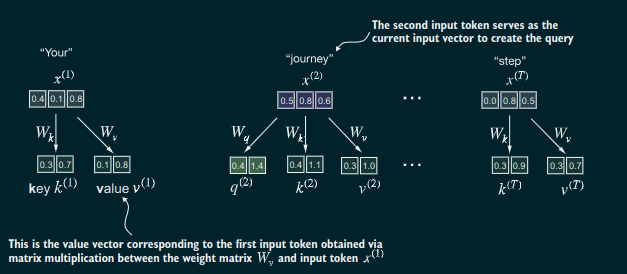

In [10]:
# computing query , key and values pairs
d_in , d_out = inputs.shape[1] , 2
x_2 = inputs[1]

torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

# computing Q,K,V for the second word
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value

print(query_2)

tensor([0.4306, 1.4551])


Computing Q,K,V parameters for all the words

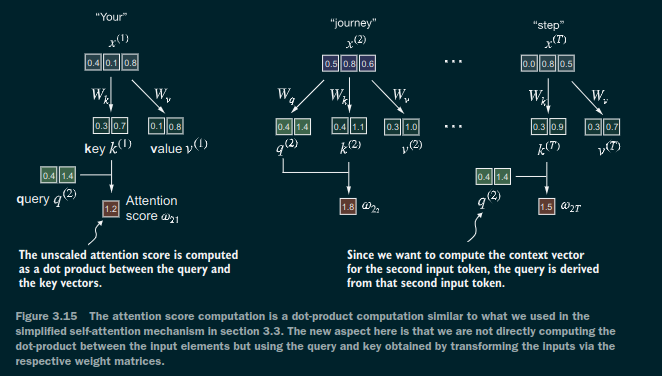

In [11]:
keys = inputs @ W_key
values = inputs @ W_value

print("Keys shape : " , keys.shape)
print("Values shape : " , values.shape)

Keys shape :  torch.Size([6, 2])
Values shape :  torch.Size([6, 2])


In [12]:
# Computing attention score for second word
attn_scores_2 = query_2  @ keys.T
print(attn_scores_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


Obtaining the attension weights 

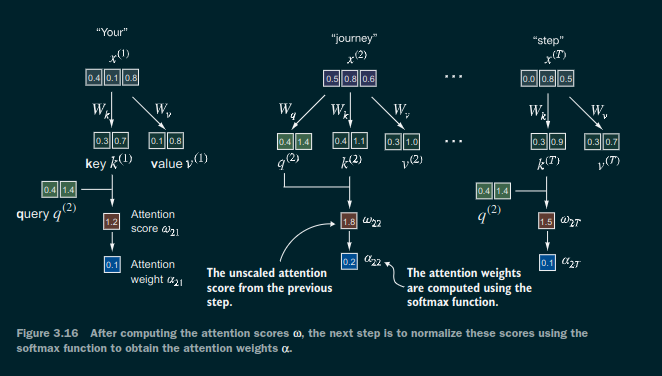

However, now we scale the attention scores by dividing them by the square root of the embedding dimension of the keys (taking the square root is mathematically the same as exponentiating by 0.5):

![Screenshot from 2025-04-19 19-11-19.png](<attachment:Screenshot from 2025-04-19 19-11-19.png>)
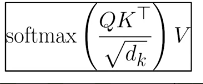

In [13]:
d_k = keys.shape[-1] 
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1) 
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


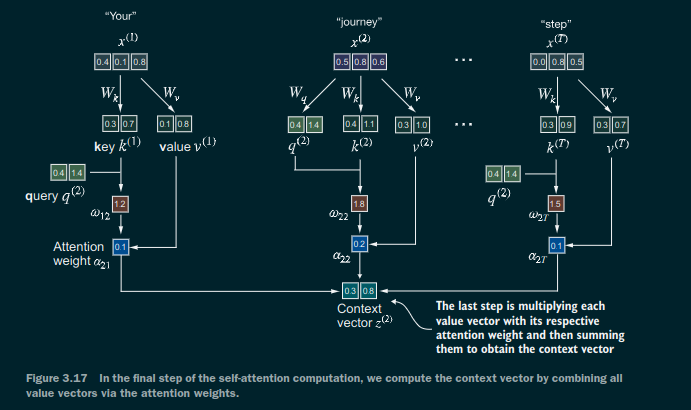

In [14]:
# compute context vector for the second word
context_vector_2 = attn_weights_2 @ values
print(context_vector_2)

tensor([0.3061, 0.8210])


# Compact self-implementation of self attention

In [15]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):
    def __init__(self,d_in,d_out):
        super().__init__()
        self.W_key = nn.Parameter(torch.rand(d_in,d_out))
        self.W_query = nn.Parameter(torch.rand(d_in,d_out))
        self.W_value = nn.Parameter(torch.rand(d_in,d_out))

    def forward(self,x):
        keys = x @ self.W_key
        querys = x @ self.W_query
        values = x @ self.W_value

        attn_scores = querys @ keys.T
        attn_weights = torch.softmax( attn_scores / keys.shape[1] ** 0.5 , dim=-1)
        context_vector = attn_weights @ values
        return context_vector

torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in,d_out)
sa_v1(inputs)

tensor([[0.2947, 0.7956],
        [0.3015, 0.8132],
        [0.3010, 0.8120],
        [0.2925, 0.7902],
        [0.2863, 0.7737],
        [0.2979, 0.8043]], grad_fn=<MmBackward0>)

Self attention using PyTorch's Linear Layers

In [16]:
import torch.nn as nn

class SelfAttention_v2(nn.Module):
    def __init__(self,d_in,d_out,qkv_bias=False):
        super().__init__()
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self,x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.T
        attn_weights = torch.softmax( attn_scores / keys.shape[1] ** 0.5 , dim=-1)
        context_vector = attn_weights @ values
        return context_vector

torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in,d_out)
sa_v2(inputs)

tensor([[-0.0809,  0.0638],
        [-0.0784,  0.0657],
        [-0.0784,  0.0657],
        [-0.0772,  0.0666],
        [-0.0787,  0.0652],
        [-0.0769,  0.0669]], grad_fn=<MmBackward0>)

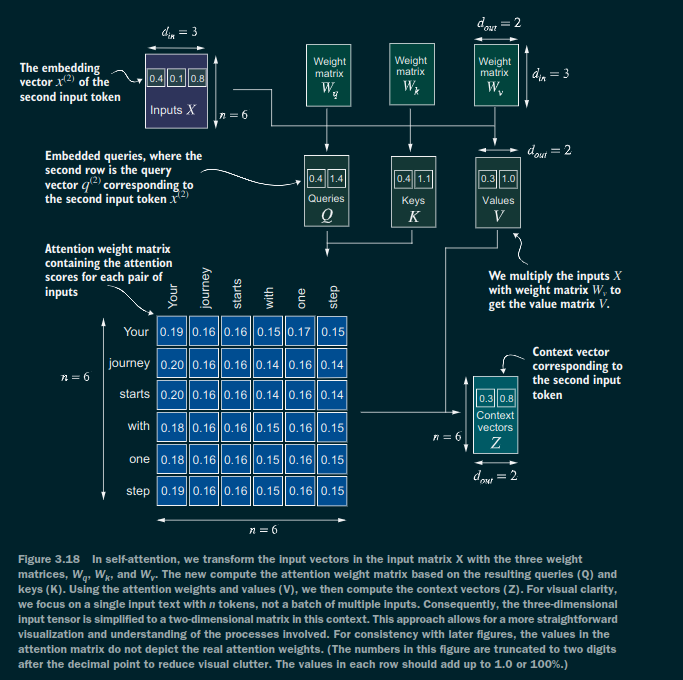

# Masked self attention 

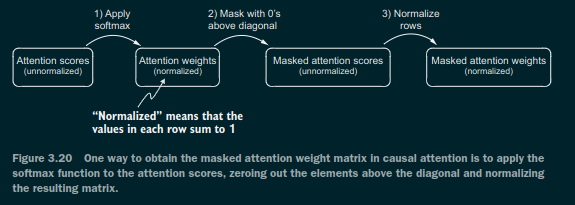

In [17]:
# Obtain the attention weights

keys = sa_v2.W_key(inputs)
queries = sa_v2.W_query(inputs)

attn_scores = keys @ queries.T
attn_weights = torch.softmax(attn_scores / keys.shape[1] ** 0.5 , dim=-1)
attn_weights

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)

In [18]:
# Using PyTorch tril function to create mask where the values above the diagonal are zero

context_length = inputs.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
mask_simple

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])

In [19]:
# obtain masked attention scores
masked_attn_score = attn_weights * mask_simple
masked_attn_score

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)

In [20]:
# normalize masked attention weights

masked_attn = masked_attn_score / masked_attn_score.sum(dim=-1, keepdim=True)
masked_attn

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)

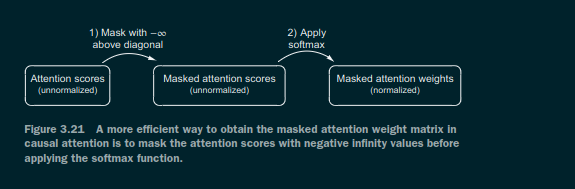

In [21]:
# the triu function adds infinite negative values to the attention scores 
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [22]:
attn_weights = torch.softmax( masked / keys.shape[1] ** 0.5, dim=1)
attn_weights

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)

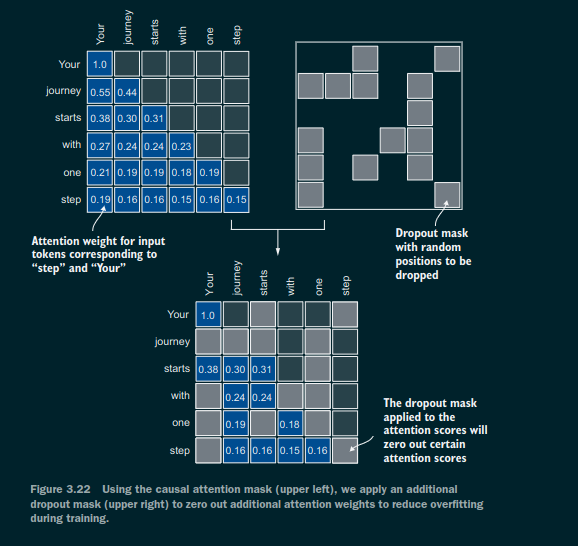

In [23]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6,6)
dropout(example)

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])

In [24]:
# Applying dropout to attension weights
torch.manual_seed(123)
dropout(attn_weights)

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7599, 0.6194, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4921, 0.4925, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3966, 0.0000, 0.3775, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.3331, 0.3084, 0.3331, 0.0000]],
       grad_fn=<MulBackward0>)

## Compact implementation of masked attention 

In [25]:
batch = torch.stack((inputs,inputs),dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [26]:
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_key = nn.Linear(d_in,d_out, bias=qkv_bias)
        self.W_query = nn.Linear(d_in,d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in,d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1))

    def forward(self, x):
        batches , num_tokens , dim = x.shape

        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.transpose(1, 2)
        # mask the attension scores
        attn_scores.masked_fill_( self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
        # normalize the attension weights
        attn_weights = torch.softmax( attn_scores / keys.shape[-1]**0.5, dim=-1) 
        # apply dropout to avoid overfitting
        attn_weights = self.dropout(attn_weights) 
        
        context_vec = attn_weights @ values 
        
        return context_vec

torch.manual_seed(123)
context_length = batch.shape[1] 
ca = CausalAttention(d_in, d_out, context_length, 0.0) 
context_vecs = ca(batch) 
print("context_vecs.shape:", context_vecs.shape)

context_vecs

context_vecs.shape: torch.Size([2, 6, 2])


tensor([[[-0.4519,  0.2216],
         [-0.5790,  0.0192],
         [-0.6226, -0.0512],
         [-0.5669, -0.0793],
         [-0.5501, -0.0919],
         [-0.5307, -0.1042]],

        [[-0.4519,  0.2216],
         [-0.5790,  0.0192],
         [-0.6226, -0.0512],
         [-0.5669, -0.0793],
         [-0.5501, -0.0919],
         [-0.5307, -0.1042]]], grad_fn=<UnsafeViewBackward0>)

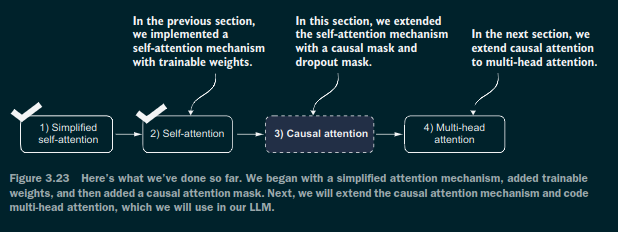

# Multi-head attension

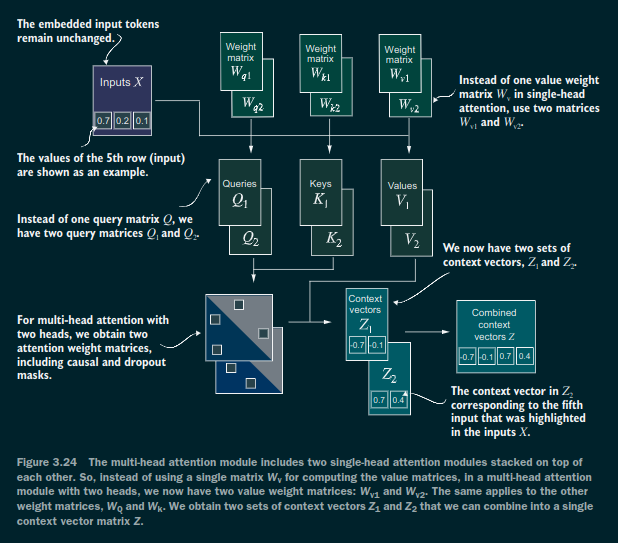

## Multi head attention using for loop logic

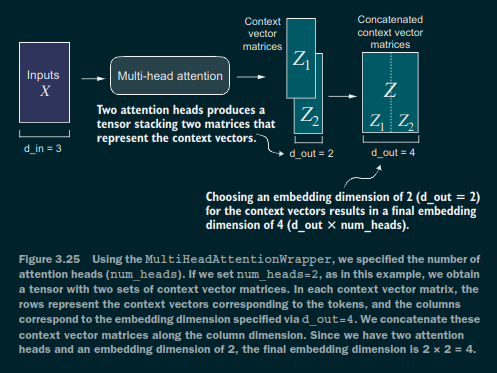

In [27]:
class MultiHeadAttentionWrapper(nn.Module): 
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False): 
        super().__init__() 
        self.heads = nn.ModuleList(
            [
                CausalAttention( 
                    d_in, d_out, context_length, dropout, qkv_bias
                ) 
                for _ in range(num_heads)
            ]) 
            
    def forward(self, x): 
        return torch.cat([head(x) for head in self.heads], dim=-1)

torch.manual_seed(123) 
context_length = batch.shape[1] # This is the number of tokens 
d_in, d_out = 3, 2

mha = MultiHeadAttentionWrapper( d_in, d_out, context_length, 0.0, num_heads=2) 
context_vecs = mha(batch) 
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5790,  0.0192,  0.5769,  0.3019],
         [-0.6226, -0.0512,  0.6100,  0.3660],
         [-0.5669, -0.0793,  0.5469,  0.3514],
         [-0.5501, -0.0919,  0.5335,  0.3406],
         [-0.5307, -0.1042,  0.5072,  0.3425]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5790,  0.0192,  0.5769,  0.3019],
         [-0.6226, -0.0512,  0.6100,  0.3660],
         [-0.5669, -0.0793,  0.5469,  0.3514],
         [-0.5501, -0.0919,  0.5335,  0.3406],
         [-0.5307, -0.1042,  0.5072,  0.3425]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


## Implementing multi-head attention with weight splits

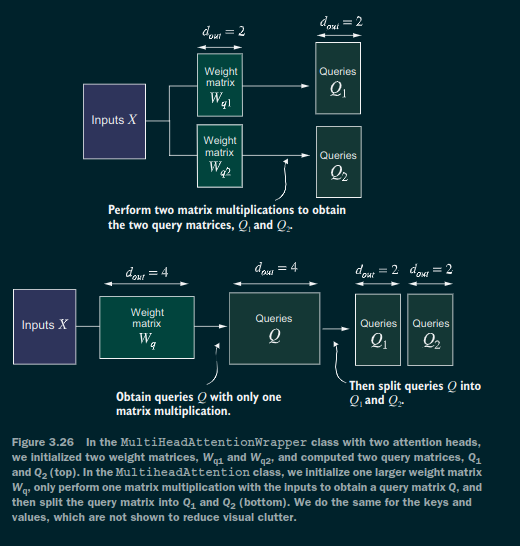

In [28]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False): 
        super().__init__()
        assert (d_out % num_heads == 0), "d_out must be divisible by num_heads"

        self.d_out = d_out 
        self.num_heads = num_heads 
        self.head_dim = d_out // num_heads

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias) 
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias) 
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

        self.out_proj = nn.Linear(d_out, d_out)
        self.dropout = nn.Dropout(dropout)

        self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length), diagonal=1))

    def forward(self, x): 
        b, num_tokens, d_in = x.shape 
        keys = self.W_key(x) 
        queries = self.W_query(x) 
        values = self.W_value(x)

        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view( b, num_tokens, self.num_heads, self.head_dim)

        keys = keys.transpose(1, 2) 
        queries = queries.transpose(1, 2) 
        values = values.transpose(1, 2)

        attn_scores = queries @ keys.transpose(2, 3) 
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        attn_scores.masked_fill_(mask_bool, -torch.inf)
        attn_weights = torch.softmax( attn_scores / keys.shape[-1]**0.5, dim=-1) 
        attn_weights = self.dropout(attn_weights)
        
        context_vec = (attn_weights @ values).transpose(1, 2) 
        context_vec = context_vec.contiguous().view( b, num_tokens, self.d_out) 
        context_vec = self.out_proj(context_vec)
        
        return context_vec

torch.manual_seed(123) 
batch_size, context_length, d_in = batch.shape 
d_out = 2
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs) 
print("context_vecs.shape:", context_vecs.shape)

tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


## Understanding matrix multiplication in multi head attension

In [29]:
a = torch.tensor([[[[0.2745, 0.6584, 0.2775, 0.8573],
                    [0.8993, 0.0390, 0.9268, 0.7388],
                    [0.7179, 0.7058, 0.9156, 0.4340]],
                   [[0.0772, 0.3565, 0.1479, 0.5331],
                    [0.4066, 0.2318, 0.4545, 0.9737],
                    [0.4606, 0.5159, 0.4220, 0.5786]]]])
a

tensor([[[[0.2745, 0.6584, 0.2775, 0.8573],
          [0.8993, 0.0390, 0.9268, 0.7388],
          [0.7179, 0.7058, 0.9156, 0.4340]],

         [[0.0772, 0.3565, 0.1479, 0.5331],
          [0.4066, 0.2318, 0.4545, 0.9737],
          [0.4606, 0.5159, 0.4220, 0.5786]]]])

In [30]:
a.transpose(2,3)

tensor([[[[0.2745, 0.8993, 0.7179],
          [0.6584, 0.0390, 0.7058],
          [0.2775, 0.9268, 0.9156],
          [0.8573, 0.7388, 0.4340]],

         [[0.0772, 0.4066, 0.4606],
          [0.3565, 0.2318, 0.5159],
          [0.1479, 0.4545, 0.4220],
          [0.5331, 0.9737, 0.5786]]]])

In [31]:
# matrix mulitplication with all matrix in single operation
print(a @ a.transpose(2, 3))

tensor([[[[1.3208, 1.1631, 1.2879],
          [1.1631, 2.2150, 1.8424],
          [1.2879, 1.8424, 2.0402]],

         [[0.4391, 0.7003, 0.5903],
          [0.7003, 1.3737, 1.0620],
          [0.5903, 1.0620, 0.9912]]]])


In [32]:
# individually performing matrix multiplication 

first_head = a[0, 0, :, :] 
first_res = first_head @ first_head.T 
print("First head:\n", first_res) 

second_head = a[0, 1, :, :] 
second_res = second_head @ second_head.T
print("\nSecond head:\n", second_res)

First head:
 tensor([[1.3208, 1.1631, 1.2879],
        [1.1631, 2.2150, 1.8424],
        [1.2879, 1.8424, 2.0402]])

Second head:
 tensor([[0.4391, 0.7003, 0.5903],
        [0.7003, 1.3737, 1.0620],
        [0.5903, 1.0620, 0.9912]])
